In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stat

!pip install folium
import folium

In [444]:
df = pd.read_csv('Covid-19 SG.csv')
df

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Daily Imported,Daily Local transmission,Local cases residing in dorms MOH report,Local cases not residing in doms MOH report,Intensive Care Unit (ICU),General Wards MOH report,In Isolation MOH report,Total Completed Isolation MOH report,Total Hospital Discharged MOH report,Circuit Break
0,23/1/2020,1,NaN,1,0,0,0,0,1,0,...,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,24/1/2020,2,NaN,3,0,0,0,0,3,0,...,2,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,25/1/2020,1,NaN,4,0,0,0,0,4,0,...,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,26/1/2020,0,NaN,4,0,0,0,0,4,0,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,27/1/2020,1,NaN,5,0,0,0,0,5,0,...,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,7/8/2020,242,0.0,54797,281,0,48332,6334,96,0,...,6,236,235.0,1.0,0,124.0,6334.0,46196.0,2116.0,0
198,8/8/2020,132,0.0,54929,271,0,48603,6174,117,0,...,6,126,125.0,1.0,0,145.0,6174.0,46457.0,2126.0,0
199,9/8/2020,175,0.0,55104,332,0,48935,6027,107,0,...,3,172,171.0,1.0,0,135.0,6027.0,46778.0,2137.0,0
200,10/8/2020,188,0.0,55292,694,0,49629,5544,84,0,...,12,176,175.0,1.0,0,112.0,5544.0,47453.0,2156.0,0


## 1. Exploratory Data Analysis
1.1. Understand the variables

1.2. Handle missing values

1.3. Visualization

### Understand the variables
- What are variables? Their types?
- Null values?
- Their descriptive statistics

In [445]:
df.columns

Index(['Date', 'Daily Confirmed ', 'False Positives Found',
       'Cumulative Confirmed', 'Daily Discharged',
       'Passed but not due to COVID', 'Cumulative Discharged',
       'Discharged to Isolation', 'Still Hospitalised', 'Daily Deaths',
       'Cumulative Deaths', 'Tested positive demise', 'Daily Imported',
       'Daily Local transmission', 'Local cases residing in dorms MOH report',
       'Local cases not residing in doms MOH report',
       'Intensive Care Unit (ICU)', 'General Wards MOH report',
       'In Isolation MOH report', 'Total Completed Isolation MOH report',
       'Total Hospital Discharged MOH report', 'Circuit Break'],
      dtype='object')

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 22 columns):
Date                                           202 non-null object
Daily Confirmed                                202 non-null int64
False Positives Found                          93 non-null float64
Cumulative Confirmed                           202 non-null int64
Daily Discharged                               202 non-null int64
Passed but not due to COVID                    202 non-null int64
Cumulative Discharged                          202 non-null int64
Discharged to Isolation                        202 non-null int64
Still Hospitalised                             202 non-null int64
Daily Deaths                                   202 non-null int64
Cumulative Deaths                              202 non-null int64
Tested positive demise                         202 non-null int64
Daily Imported                                 202 non-null int64
Daily Local transmission           

In [447]:
df.describe()

,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,Cumulative Deaths,...,Daily Imported,Daily Local transmission,Local cases residing in dorms MOH report,Local cases not residing in doms MOH report,Intensive Care Unit (ICU),General Wards MOH report,In Isolation MOH report,Total Completed Isolation MOH report,Total Hospital Discharged MOH report,Circuit Break
count,202.000000,93.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,136.000000,136.000000,202.000000,145.000000,145.000000,145.000000,145.000000,202.000000
mean,274.207921,0.397849,21313.158416,248.257426,0.029703,15295.257426,5531.633663,469.103960,0.133663,14.089109,...,3.693069,270.514851,383.110294,16.852941,9.222772,595.786207,7754.131034,20056.862069,1217.937931,0.277228
std,283.703276,3.630007,20502.928157,319.265923,0.170188,18544.010754,6116.244304,666.134908,0.382393,11.424943,...,7.995325,285.941149,261.781607,18.316772,9.444516,562.119664,5928.359450,18095.532169,677.873177,0.448742
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,104.000000,0.000000,0.000000,131.000000,0.000000
25%,13.000000,0.000000,203.000000,5.000000,0.000000,99.000000,0.000000,82.500000,0.000000,0.000000,...,0.000000,6.250000,186.250000,4.000000,1.000000,188.000000,3604.000000,474.000000,528.000000,0.000000
50%,202.000000,0.000000,17876.500000,61.500000,0.000000,1397.500000,3719.000000,180.000000,0.000000,17.500000,...,0.000000,200.000000,330.500000,9.000000,7.000000,313.000000,5883.000000,20245.000000,1454.000000,0.000000
75%,447.000000,0.000000,42258.500000,339.500000,0.000000,35448.000000,10394.500000,566.750000,0.000000,26.000000,...,3.000000,447.000000,541.000000,23.250000,17.000000,994.000000,12635.000000,38892.000000,1825.000000,1.000000
max,1426.000000,35.000000,55353.000000,1337.000000,1.000000,50148.000000,19667.000000,4229.000000,2.000000,27.000000,...,48.000000,1426.000000,1371.000000,75.000000,32.000000,2899.000000,19667.000000,47960.000000,2168.000000,1.000000


In [454]:
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')
df.index

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11'],
              dtype='datetime64[ns]', name='Date', length=202, freq=None)

### Handle missing values

In [11]:
#local residing/not residing in dorm = local chia %
#general wards = still hospitalized - icu
#cumulative discharged - total completed isolation = total hospital discharged
#total completed isolation = 0
#omit in isolation as in isolation = discharged to isolation 

In [455]:
df['Local cases not residing in doms MOH report'].fillna(value=df['Daily Local transmission'],inplace=True,limit=37)
df['Local cases not residing in doms MOH report'].fillna(value=0.2*df['Daily Local transmission'],inplace=True)
df['Local cases residing in dorms MOH report'].fillna(value=df['Daily Local transmission']-df['Local cases not residing in doms MOH report'],inplace=True)
df['General Wards MOH report'].fillna(value=df['Still Hospitalised']-df['Intensive Care Unit (ICU)'],inplace=True)
df['Total Completed Isolation MOH report'].fillna(value=0,inplace=True)
df=df.drop(columns=['In Isolation MOH report', 'False Positives Found'])
df['Total Hospital Discharged MOH report'].fillna(value=df['Cumulative Discharged'],inplace=True)

In [456]:
df

,Daily Confirmed,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,Cumulative Deaths,Tested positive demise,Daily Imported,Daily Local transmission,Local cases residing in dorms MOH report,Local cases not residing in doms MOH report,Intensive Care Unit (ICU),General Wards MOH report,Total Completed Isolation MOH report,Total Hospital Discharged MOH report,Circuit Break
Date,,,,,,,,,,,,,,,,,,,
2020-01-23,1,1,0,0,0,0,1,0,0,0,1,0,0.0,0.0,0,1.0,0.0,0.0,0
2020-01-24,2,3,0,0,0,0,3,0,0,0,2,0,0.0,0.0,0,3.0,0.0,0.0,0
2020-01-25,1,4,0,0,0,0,4,0,0,0,1,0,0.0,0.0,0,4.0,0.0,0.0,0
2020-01-26,0,4,0,0,0,0,4,0,0,0,0,0,0.0,0.0,0,4.0,0.0,0.0,0
2020-01-27,1,5,0,0,0,0,5,0,0,0,1,0,0.0,0.0,0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,242,54797,281,0,48332,6334,96,0,27,0,6,236,235.0,1.0,0,124.0,46196.0,2116.0,0
2020-08-08,132,54929,271,0,48603,6174,117,0,27,0,6,126,125.0,1.0,0,145.0,46457.0,2126.0,0
2020-08-09,175,55104,332,0,48935,6027,107,0,27,0,3,172,171.0,1.0,0,135.0,46778.0,2137.0,0


### Visualization

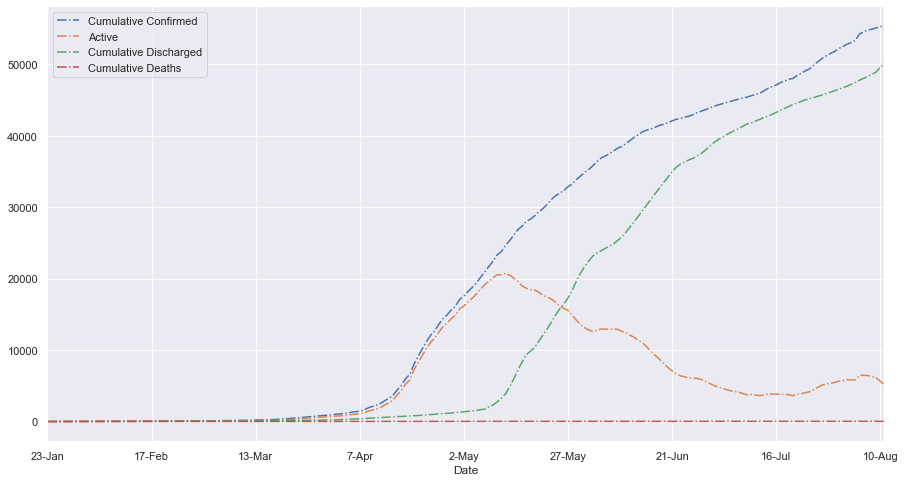

In [438]:
sns.set()
df['Active'] = df['Cumulative Confirmed']-df['Cumulative Discharged']-df['Cumulative Deaths']
df[['Cumulative Confirmed','Active','Cumulative Discharged','Cumulative Deaths']].plot(kind='line',style="-.",figsize=(15,8))

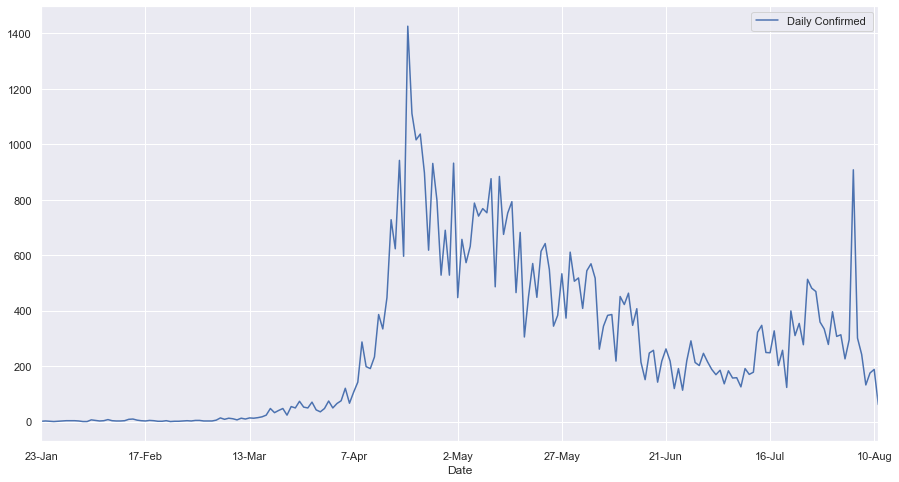

In [440]:
sns.set()
df['Daily Confirmed '].plot(kind = 'line',legend=True, figsize=(15,8))

#### Wave 1 - 2

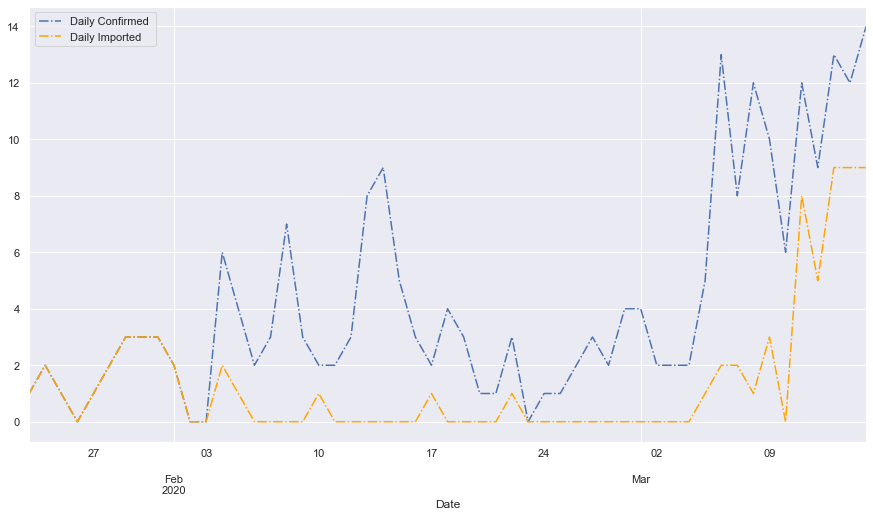

In [457]:
df['Daily Confirmed '].loc['2020-01-23':'2020-03-15'].plot(kind = 'line',style='-.',legend=True, figsize=(15,8))
df['Daily Imported'].loc['2020-01-23':'2020-03-15'].plot(kind = 'line',style='-.',legend=True, figsize=(15,8),color='orange')

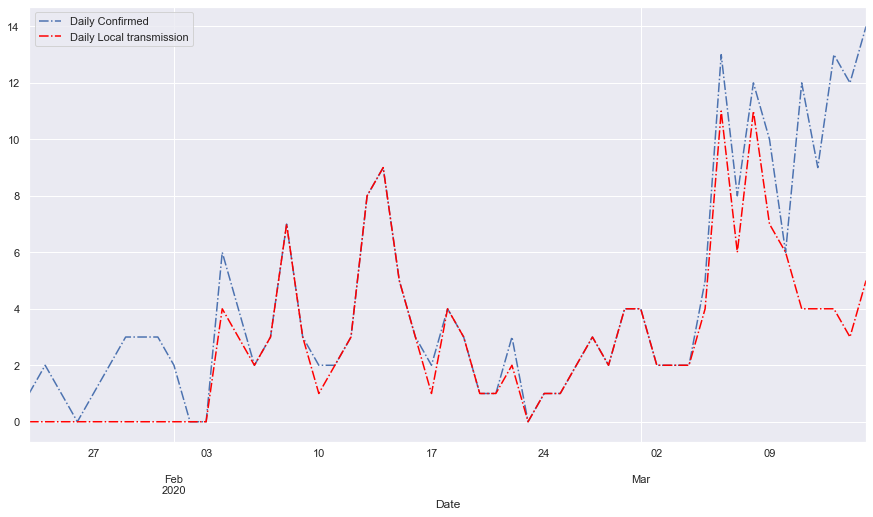

In [458]:
df['Daily Confirmed '].loc['2020-01-23':'2020-03-15'].plot(kind = 'line',style='-.',legend=True, figsize=(15,8))
df['Daily Local transmission'].loc['2020-01-23':'2020-03-15'].plot(kind='line', style='-.',legend=True, figsize=(15,8),color='red')

#### Wave 3

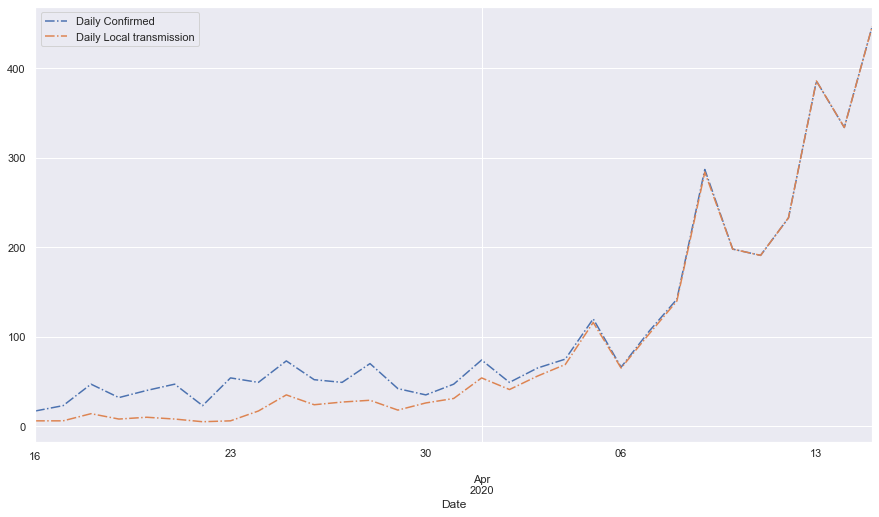

In [459]:
df['Daily Confirmed '].loc['2020-03-16':'2020-04-15'].plot(kind = 'line',style='-.',legend=True, figsize=(15,8))
df['Daily Local transmission'].loc['2020-03-16':'2020-04-15'].plot(kind='line', style='-.',legend=True, figsize=(15,8))

#### Wave 4 & 5

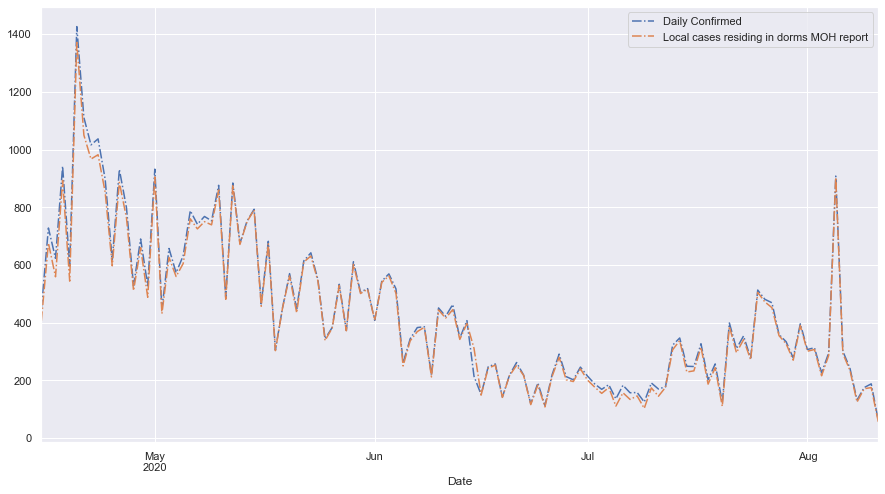

In [461]:
df['Daily Confirmed '].loc['2020-04-15':'2020-08-11'].plot(kind = 'line',style='-.',legend=True, figsize=(15,8))
df['Local cases residing in dorms MOH report'].loc['2020-04-15':'2020-08-11'].plot(kind='line', style='-.',legend=True, figsize=(15,8))

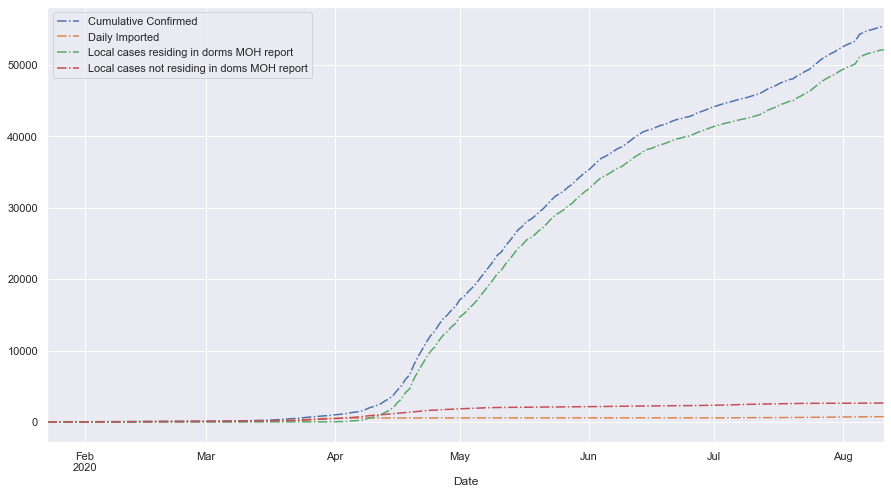

In [375]:
df['Cumulative Confirmed'].plot(kind = 'line', legend=True, style='-.', figsize=(15,8))
df['Daily Imported'].cumsum().plot(kind='line', legend=True, style='-.', figsize=(15,8))
df['Local cases residing in dorms MOH report'].cumsum().plot(kind='line', legend=True, style='-.', figsize=(15,8))
df['Local cases not residing in doms MOH report'].cumsum().plot(kind='line', legend=True, style='-.', figsize=(15,8))

#### Map illustrating the location of dorm case

In [463]:
sg_map = folium.Map(location=[1.38,103.8], zoom_start=11)
sg_map

In [61]:
location = pd.read_csv('location.csv')
location

,Location,Type,Case,Longitude,Latitude,Log
0,S11 Dormitory @ Punggol,Dorm,2846,103.895358,1.416490,3.454235
1,Sungei Tengah Lodge,Dorm,2203,103.718843,1.376573,3.343014
2,CDPL Tuas Dormitory,Dorm,2096,103.637241,1.271618,3.321391
3,Jurong Penjuru dormitory,Dorm,2089,103.731183,1.316486,3.319938
4,Cassia @ Penjuru,Dorm,1937,103.731957,1.317979,3.287130
...,...,...,...,...,...,...
312,NCS Hub,Bar and Restaurants,3,103.844206,1.387549,0.477121
313,ICA Building,Office,1,103.862643,1.306538,0.000000
314,Little Gems preschool,School,1,103.811579,1.285251,0.000000
315,Orange Ballroom,Bar and Restaurants,1,103.894287,1.316812,0.000000


In [32]:
from folium import plugins
from folium.plugins import HeatMap

In [282]:
heat = location[['Latitude', 'Longitude', 'Log']].values.tolist()
gradient = {.45: 'royalblue', .6: 'lime', .98: 'red'}
max_amount = location['Log'].max()
HeatMap(heat, radius=0.1, min_opacity=0.1, max_zoom=1, blur=10, max_val=max_amount, gradient=gradient).add_to(sg_map)

In [283]:
sg_map

## 2. Covid 19 Forecasting

In [601]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


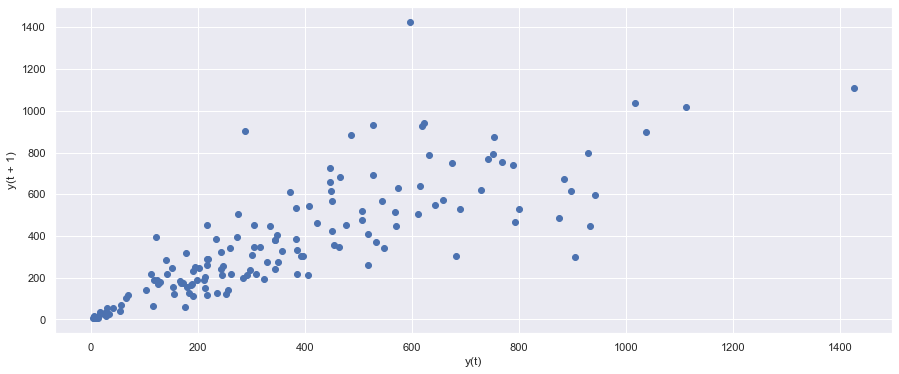

In [720]:
local = df['Daily Local transmission'].loc['2020-03-16':]
pd.plotting.lag_plot(local)


In [721]:
def test_stationarity(time_series):
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  adfuller_test = adfuller(time_series, autolag='AIC')
  adfuller_test_output = pd.Series(adfuller_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in adfuller_test[4].items():
      adfuller_test_output['Critical Value (%s)'%key] = value

  print(adfuller_test_output)

test_stationarity(local)

Results of Dickey-Fuller Test:
Test Statistic                  -2.281213
p-value                          0.178099
#Lags Used                       1.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


<Figure size 1080x432 with 0 Axes>

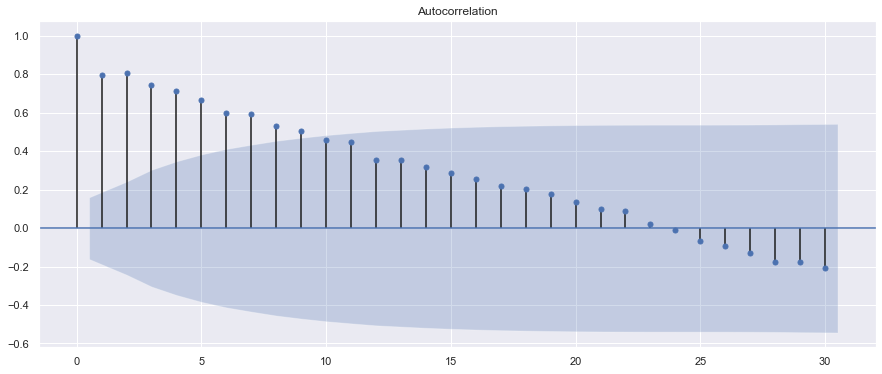

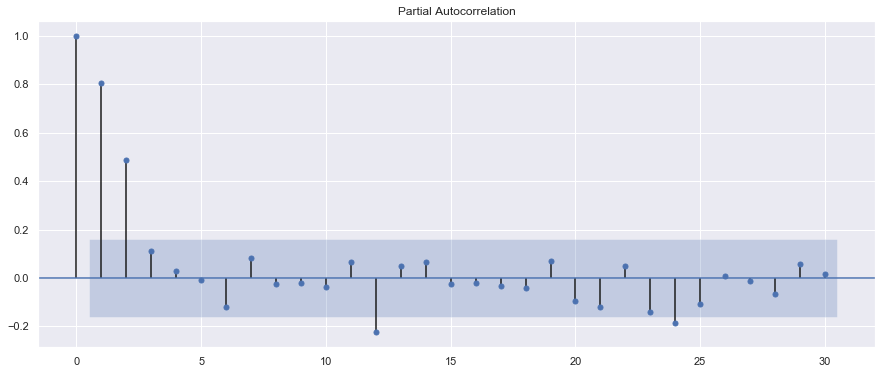

In [723]:
plt.figure(figsize=(15,6))
plot_acf(local, lags = 30)
plot_pacf(local, lags = 30)
plt.show()

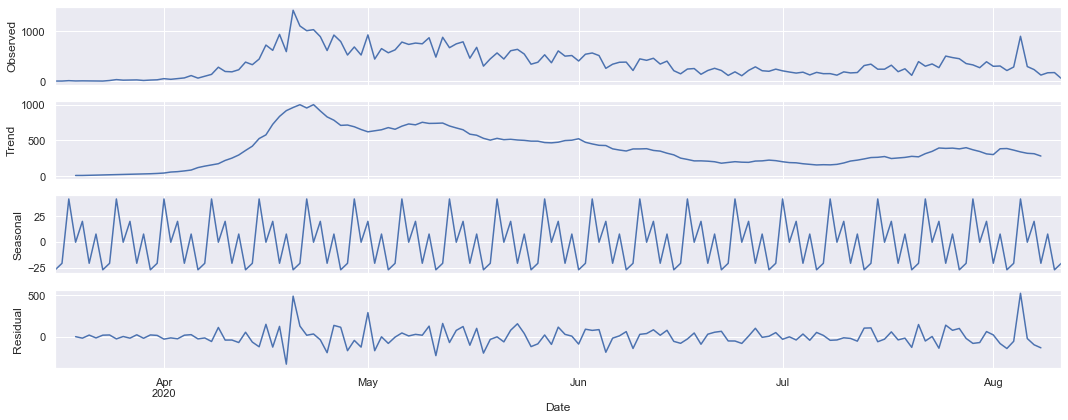

In [724]:
decomposition = sm.tsa.seasonal_decompose(local, model = 'additive')
fig = decomposition.plot()
plt.show()

In [727]:
local_diff = local.diff().dropna()
test_stationarity(local_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.216756e+01
p-value                        1.445573e-22
#Lags Used                     1.000000e+00
Number of Observations Used    1.460000e+02
Critical Value (1%)           -3.475953e+00
Critical Value (5%)           -2.881548e+00
Critical Value (10%)          -2.577439e+00
dtype: float64


<Figure size 1080x648 with 0 Axes>

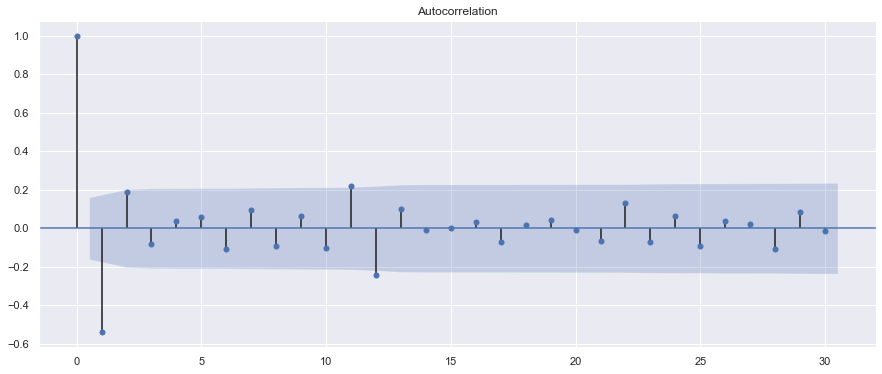

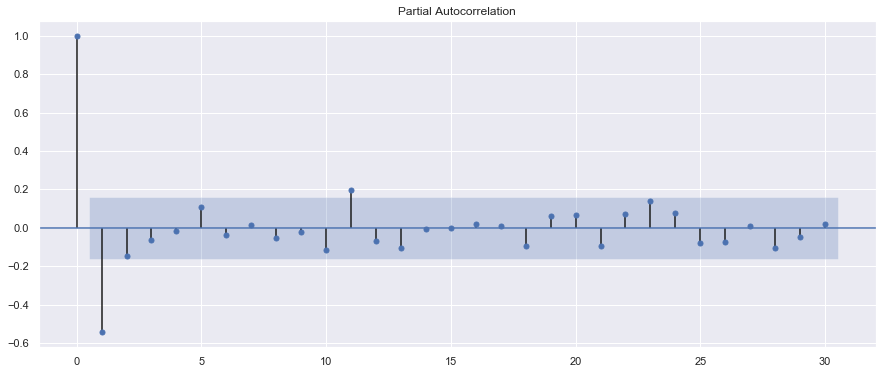

In [729]:
plt.figure(figsize=(15,9))
plot_acf(local_diff, lags = 30)
plot_pacf(local_diff, lags = 30)
plt.show()

C:\Users\84942\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\84942\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'MSE: 18023.0914')

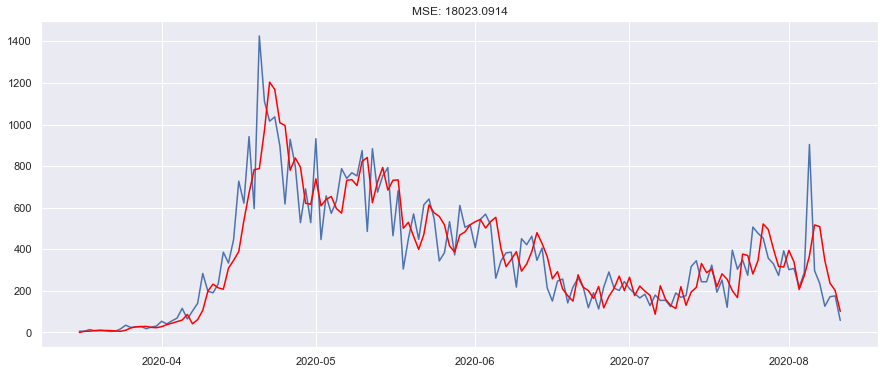

In [765]:
sarimax = SARIMAX(local, order=(5, 1, 7), seasonal_orders=(5,1,7,12),exog = df['Circuit Break'].loc['2020-03-16':])
sarimax_model_fit = sarimax.fit(disp=False)

plt.plot(local)
plt.plot(sarimax_model_fit.fittedvalues, color='red')
plt.title('MSE: %.4f'% np.mean((sarimax_model_fit.fittedvalues-local)**2))

In [766]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Statespace Model Results                              
====================================================================================
Dep. Variable:     Daily Local transmission   No. Observations:                  149
Model:                     SARIMAX(5, 1, 7)   Log Likelihood                -938.469
Date:                      Sun, 16 Aug 2020   AIC                           1904.938
Time:                              05:41:44   BIC                           1946.899
Sample:                          03-16-2020   HQIC                          1921.986
                               - 08-11-2020                                         
Covariance Type:                        opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Circuit Break   -48.9994    204.627     -0.239      0.811    -450.062     352.063
ar.L1            -1.5290      0.221     -6.927      0.000      -1.962      -1.096
ar.L2            -2.2215      0.373     -5.955      0.000      -2.953      -1.490
ar.L3            -2.1007      0.434     -4.845      0.000      -2.950      -1.251
ar.L4            -1.2689      0.359     -3.537      0.000      -1.972      -0.566
ar.L5            -0.7460      0.192     -3.884      0.000      -1.122      -0.370
ma.L1             0.9659      0.330      2.927      0.003       0.319       1.613
ma.L2             1.6019      0.447      3.587      0.000       0.727       2.477
ma.L3             1.1480      0.655      1.752      0.080      -0.136       2.432
ma.L4             0.5062      0.445      1.137      0.256      -0.367       1.379
ma.L5             0.4758      0.371      1.284      0.199      -0.251       1.202
ma.L6            -0.2122      0.198     -1.074      0.283      -0.600       0.175
ma.L7             0.2961      0.182      1.631      0.103      -0.060       0.652
sigma2          2.28e+04   8105.133      2.813      0.005    6915.889    3.87e+04
===================================================================================
Ljung-Box (Q):                       15.77   Jarque-Bera (JB):               130.13
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.80
Prob(H) (two-sided):                  0.25   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""